## Keras

**`Keras`** es una librería escrita en Python, diseñada específicamente para hacer experimentos con redes neuronales. Permite crear prototipos rápidamente y de manera fácil, pues está pensada para que sea fácil de usar.

```html
pip install tensorflow
```

_**Documentación**: https://keras.io/guides/sequential_model/_

In [ ]:
!pip install --upgrade tensorflow

In [1]:
import numpy as np

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt

import tensorflow as tf # Para ver la versión
import keras # Para ver la versión

# Dataset
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input
from keras.utils import to_categorical # One-Hot Encoding

import sklearn # Para ver la versión

from sklearn.metrics import confusion_matrix

/Users/federicollanes/miniforge3/envs/fede/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"tensorflow=={tf.__version__}")
print(f"keras=={keras.__version__}")
print(f"scikit-learn=={matplotlib.__version__}")

# Unidades de procesamiento
print("\nUnidades de procesamiento:")
for device in tf.config.list_physical_devices():
    print(f"\t- {device.name}")

numpy==1.26.4
matplotlib==3.4.2
tensorflow==2.17.0
keras==3.5.0
scikit-learn==3.4.2

Unidades de procesamiento:
	- /physical_device:CPU:0


In [4]:
# Descargamos el dataset
# MNIST es un dataset de imagenes de numeros en escala de grises

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train[0].shape

(28, 28)

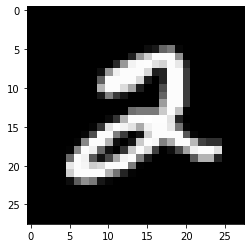

In [9]:
plt.imshow(X_train[5], cmap = "gray")
plt.show()

In [16]:
28*28

784

In [10]:
y_train[5]

2

In [12]:
type(X_train)

numpy.ndarray

In [11]:
# Train
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [13]:
# Test
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### Normalizacion

In [15]:
# Como tratamos con imagenes y el valor maximo es 255
# Dividimos todos los valores por 255

X_train = X_train / 255
X_test = X_test / 255

### One Hot Encoding

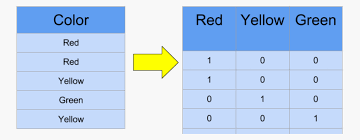

In [18]:
y_train[0]

5

In [19]:
# One-Hot Encoding 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [21]:
num_classes = len(y_train[0])
num_classes

10

In [22]:
X_train.shape

(60000, 28, 28)

### Neural Network

In [24]:
(X_train.shape[1], X_train.shape[2])

(28, 28)

In [25]:
# Inicializamos el modelo
model = Sequential()

# Capa de Entrada
model.add(Input(shape = (X_train.shape[1], X_train.shape[2])))

model.add(Flatten())

# Capas Ocultas
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(0.5))

# Capa de Salida (Si es un problema de clasificación multiple siempre debe terminar con "softmax")
model.add(Dense(units = num_classes, activation = "softmax"))

# Compilamos el modelo
model.compile(optimizer = "adam",
              loss      = "categorical_crossentropy",
              metrics   = ["accuracy"])

In [26]:
# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
256*128 + 128

32896

In [29]:
# Entrenamos el modelo

history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = 10,
                    verbose = 1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9133 - loss: 0.3283 - val_accuracy: 0.9601 - val_loss: 0.1438
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9325 - loss: 0.2598 - val_accuracy: 0.9668 - val_loss: 0.1219
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9428 - loss: 0.2254 - val_accuracy: 0.9685 - val_loss: 0.1144
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9483 - loss: 0.2058 - val_accuracy: 0.9709 - val_loss: 0.1017
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9515 - loss: 0.1949 - val_accuracy: 0.9731 - val_loss: 0.0961
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9539 - loss: 0.1801 - val_accuracy: 0.9720 - val_loss: 0.1028
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9547 - loss: 0.1787 - val_accuracy: 0.9744 - val_loss: 0.0959
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9585 - loss: 0

In [33]:
# Metricas
scores = model.evaluate(X_test, y_test, verbose = 1)

scores

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9706 - loss: 0.1143


[0.09555443376302719, 0.9750000238418579]

In [53]:
# Metricas
loss, acc = model.evaluate(X_test, y_test, verbose = 1)

print(loss)
print(acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9706 - loss: 0.1143
0.09555443376302719
0.9750000238418579


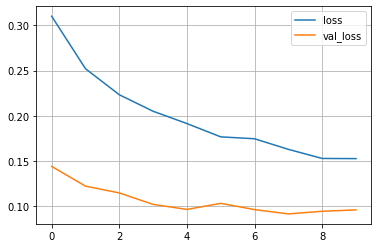

In [34]:
# loss
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.grid()
plt.show()

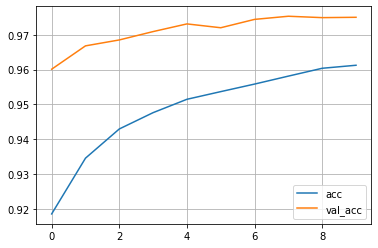

In [35]:
# accuracy
plt.plot(history.history["accuracy"], label = "acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.grid()
plt.show()

In [36]:
yhat = model.predict(X_test)
yhat

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[1.00324656e-13, 4.55115980e-12, 2.09488693e-08, ...,
        9.99997854e-01, 1.83613094e-14, 1.39505926e-06],
       [2.17512564e-10, 6.56250393e-07, 9.99995708e-01, ...,
        4.44529107e-08, 6.47675735e-09, 8.58506432e-15],
       [1.25926725e-22, 1.00000000e+00, 1.30651539e-13, ...,
        8.31058833e-12, 1.01185588e-10, 9.06559352e-16],
       ...,
       [3.31625732e-14, 1.95537520e-09, 1.12309220e-08, ...,
        1.05438565e-08, 3.33740879e-09, 9.44277588e-07],
       [2.59347344e-17, 1.40045949e-21, 2.45999218e-22, ...,
        5.78274928e-22, 3.38576667e-10, 2.44466752e-12],
       [7.86428388e-12, 5.37065264e-16, 2.68111423e-15, ...,
        2.36681304e-17, 1.44905550e-12, 9.59018210e-19]], dtype=float32)

In [48]:
np.argmax(yhat[20])

9

In [49]:
np.max(yhat[20])

0.9882687

In [38]:
yhat.shape

(10000, 10)

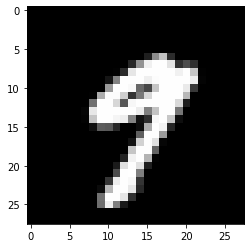

In [52]:
plt.imshow(X_test[20], cmap = "gray")
plt.show()

In [ ]:
yhat = np.array([np.argmax(i) for i in yhat])
# y_hat

In [60]:
y_hat_labels = yhat.argmax(axis = 1)
y_test_labels = y_test.argmax(axis = 1)

In [61]:
confusion_matrix(y_test_labels, y_hat_labels)

array([[ 969,    0,    0,    2,    0,    0,    4,    2,    3,    0],
       [   0, 1124,    3,    2,    0,    1,    1,    0,    4,    0],
       [   6,    3, 1009,    4,    0,    0,    0,    6,    4,    0],
       [   0,    0,    5,  986,    0,    7,    0,    6,    2,    4],
       [   1,    2,    1,    0,  957,    0,    6,    2,    3,   10],
       [   2,    0,    0,    6,    0,  878,    4,    0,    1,    1],
       [   5,    3,    1,    0,    5,    9,  931,    0,    4,    0],
       [   1,    7,    9,    3,    0,    1,    0, 1001,    2,    4],
       [   5,    2,    4,    4,    4,   11,    2,    4,  929,    9],
       [   2,    6,    0,    5,   12,    4,    1,    7,    6,  966]])

In [62]:
print(f"Accuracy: {scores[1]}\nError: {1 - scores[1]}")

Accuracy: 0.9750000238418579
Error: 0.02499997615814209


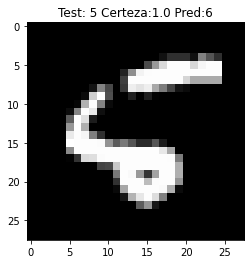

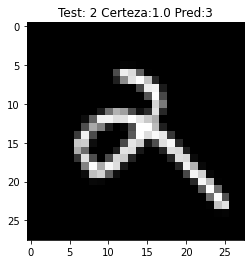

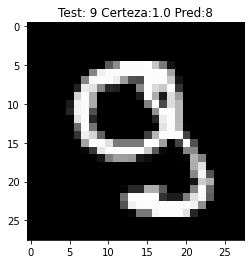

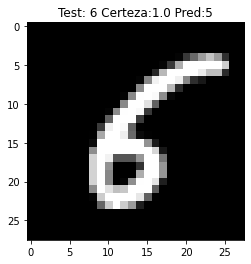

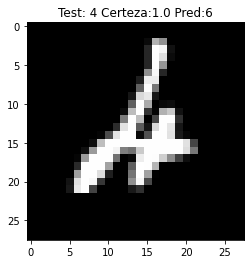

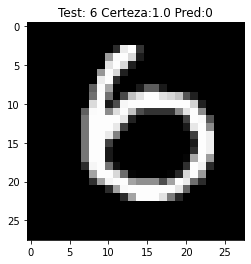

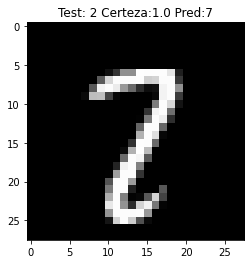

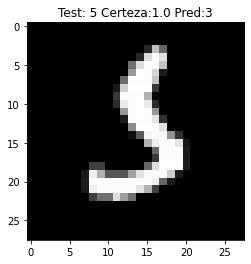

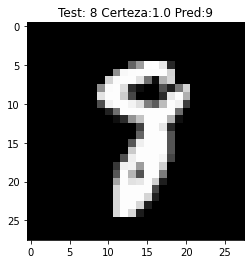

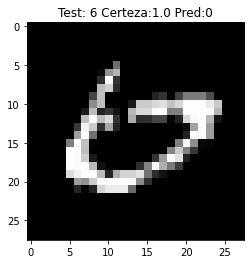

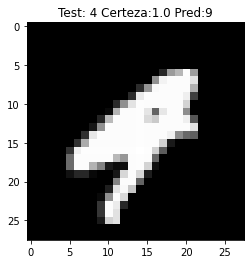

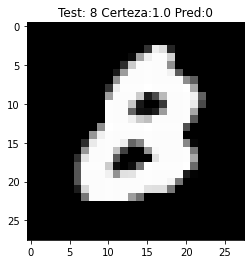

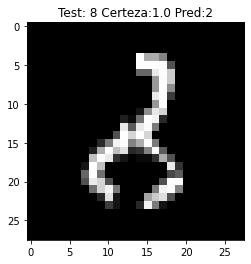

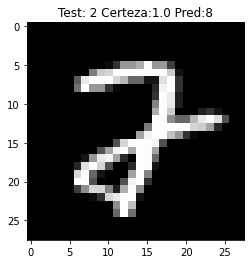

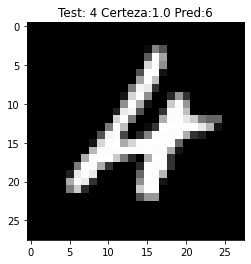

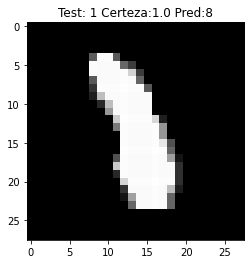

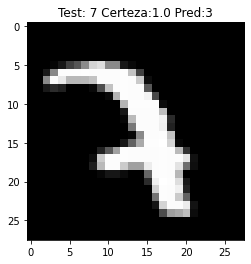

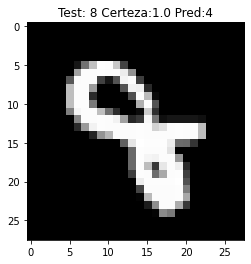

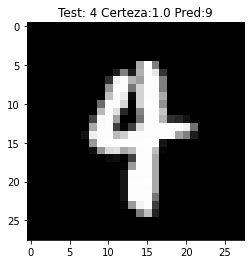

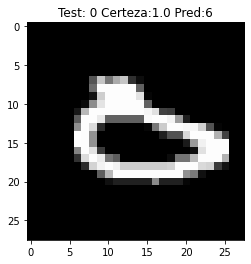

In [75]:
errores = np.where(y_test_labels != y_hat_labels)[0]

for e in errores[:20]:
    
    plt.imshow(X_test[e], cmap = "gray")
    plt.title(f"Test: {y_test_labels[e]} Certeza:{round(np.max(yhat[3]), 3)} Pred:{y_hat_labels[e]}")
    plt.show()

In [ ]:
np.where(y_test != yhat)

In [ ]:
# Guardar Modelo
model.save("kmnist_modelo.keras")

In [ ]:
# Cargar un modelo

from keras.models import load_model

modelo_preentrenado = load_model("kmnist_modelo.keras")

modelo_preentrenado.predict(X_test)

# Utilizar un modelo de estos para los datos del titanic

In [81]:
import pandas as pd

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [87]:
# Datos

df = pd.read_csv(filepath_or_buffer = "../Data/titanic_preprocesamiento.csv")

X = df.drop(["Survived"], axis = 1).values
y = df["Survived"].values

# Train, Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# MinMaxScaler
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (700, 11), X_test: (176, 11)
y_train: (700,), y_test: (176,)


In [91]:
NUM_CLASSES = len(set(y_train))

In [92]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [96]:
X_train.shape

(700, 11)

# Modelo

In [99]:
# Inicializamos el modelo
model = Sequential()

# Capa de Entrada
model.add(Input(shape = (X_train.shape[1], )))

#model.add(Flatten())

# Capas Ocultas
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(0.5))

# Capa de Salida (Si es un problema de clasificación multiple siempre debe terminar con "softmax")
model.add(Dense(units = NUM_CLASSES, activation = "softmax"))

# Compilamos el modelo
model.compile(optimizer = "adam",
              loss      = "categorical_crossentropy",
              metrics   = ["accuracy"])

In [100]:
# Entrenamos el modelo

history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = 100,
                    verbose = 1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8087 - loss: 0.4102 - val_accuracy: 0.7898 - val_loss: 0.4921
Epoch 97/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8574 - loss: 0.3511 - val_accuracy: 0.7955 - val_loss: 0.4933
Epoch 98/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8616 - loss: 0.3470 - val_accuracy: 0.7955 - val_loss: 0.4978
Epoch 99/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8317 - loss: 0.3951 - val_accuracy: 0.7784 - val_loss: 0.4995
Epoch 100/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8311 - loss: 0.3862 - val_accuracy: 0.7784 - val_loss: 0.5037


In [102]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [105]:
y_pred_labels = y_pred.argmax(axis = 1)

In [106]:
y_test_labels = y_test.argmax(axis = 1)

In [107]:
(y_test_labels == y_pred_labels).mean()

0.7784090909090909

In [ ]:
################################################################################################################################